In [1]:
import numpy as np
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from MNIST import IMAGES #DADOS DOS NÙMEROS ESCRITOS A MÂO--UMA CLASS FOI CRIADA EM OUTRO ARQUIVO PARA QUE OS DADOS ESTIVESSEM EM UM FORMATO PRÀTICO PARA A REDE NEURAL 
DATA_FULL=IMAGES()
DATA_train,RESULTS_train,DATA_check,RESULTS_check=DATA_FULL.IMAGES_IN_ARRAY()


In [3]:
aux1=np.zeros((len(RESULTS_train),10)) #OS OUTPUTS VINHAM EM INTEIROS ENTRE 0,9- POREM FORAM TRANSFORMANDOS EM UM ARRAY COM DEZ DIMENSÔES \n APRIMEIRA DIMENSÇAO SIGNIFICA ZERO
for i in range(len(RESULTS_train)):
    aux1[i,RESULTS_train[i]]=1
RESULTS_train=np.asarray(aux1)

In [4]:
aux1=np.zeros((len(RESULTS_check),10))#OS OUTPUTS VINHAM EM INTEIROS ENTRE 0,9- POREM FORAM TRANSFORMANDOS EM UM ARRAY COM DEZ DIMENSÔES \n APRIMEIRA DIMENSÇAO SIGNIFICA ZERO
for i in range(len(RESULTS_check)):
    aux1[i,RESULTS_check[i]]=1
RESULTS_check=np.asarray(aux1)


In [6]:
model = Sequential()#INICIO REDE NEURAL

In [7]:
model.add(Dense(80,activation='relu',use_bias=True, input_dim=784))# A PRIORI A IMAGEM DOS NUMEROS ERA QUADRADA, porem foram transformados em um array de 784=28*28 d [28,28]

In [8]:
model.add(Dense(80,activation='relu'))

In [9]:
model.add(Dense(10,activation='sigmoid'))

In [10]:
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                62800     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                810       
Total params: 70,090
Trainable params: 70,090
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(DATA_train,RESULTS_train, epochs=2, batch_size=10,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 30s 547us/step - loss: 0.1831 - accuracy: 0.9743 - val_loss: 0.0703 - val_accuracy: 0.9859
Epoch 2/2
54000/54000 [==============================] - 29s 540us/step - loss: 0.0937 - accuracy: 0.9830 - val_loss: 0.0810 - val_accuracy: 0.9875


In [12]:
RESULTS_NN=model.predict(DATA_check)

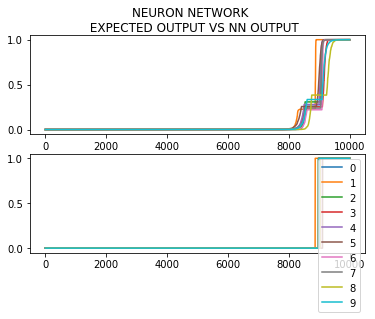

In [260]:
fig,axs=plt.subplots(nrows=2,ncols=1)#,figsize=(200,50),dpi=100)
aux_1=np.arange(len(RESULTS_NN))
plt.suptitle('NEURON NETWORK \n EXPECTED OUTPUT VS NN OUTPUT')
for i in range(10):
    num=str(i)
    axs[1].plot(aux_1,sorted(RESULTS_check[:,i]),label=num)
    axs[0].plot(aux_1,sorted(RESULTS_NN[:,i]),label=num)
plt.legend( loc = 'upper right')

plt.show()

In [265]:
DIG=DATA_check[np.random.randint(len(DATA_check),size=1)]#PARA FACIL VISUALIZAÇÂO- FOI SORTEADA UMA IMAGEM PARA SER RECONHECIDA ENQUANTO NUMERO
RESULT_temp=model.predict(DIG)
DIG=DIG.reshape(-1,28)


Text(0.5, 1.0, 'IMAGE INPUT FROM THE MNIST DATA')

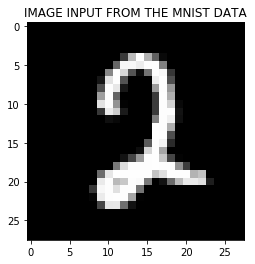

In [266]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(DIG,cmap='gray')
plt.title('IMAGE INPUT FROM THE MNIST DATA')





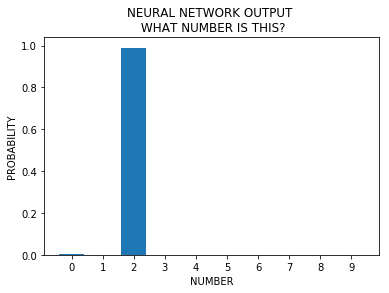

In [267]:
aux1=np.arange(len(RESULT_temp[0,]))
plt.bar(aux1,RESULT_temp[0,:])
plt.xticks(np.arange(len(RESULT_temp[0,])))
plt.title('NEURAL NETWORK OUTPUT \n WHAT NUMBER IS THIS?')
plt.xlabel('NUMBER')
plt.ylabel('PROBABILITY')
plt.show()


Text(0.5, 1.0, 'ORIGINAL IMAGE')

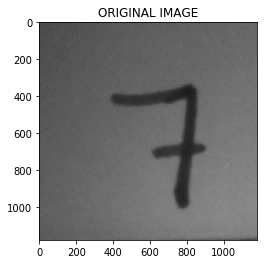

In [244]:
import cv2
originalImage = cv2.imread('num_test_NN_v3.jpeg')
plt.imshow(originalImage)
plt.title('ORIGINAL IMAGE')

In [200]:
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)

In [201]:
(thresh, B_W_img) = cv2.threshold(grayImage, 70, 255, cv2.THRESH_BINARY)

True

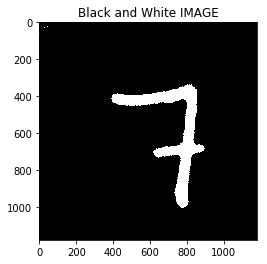

In [245]:
B_W_img = cv2.bitwise_not(B_W_img)
plt.imshow(B_W_img,cmap='gray')
plt.title('Black and White IMAGE')
cv2.imwrite('num_test_NN_v3.png',B_W_img)

Text(0.5, 1.0, 'B&W IMAGE RESIZE IN [28,28]')

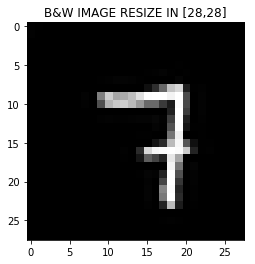

In [254]:
from PIL import Image
img = Image.open('num_test_NN_v3.png')
img=img.convert('L')
img=img.rotate(0)
#img=img.resize((28,28),Image.BICUBIC)
img.thumbnail((28, 28), Image.ANTIALIAS)
plt.imshow(img,cmap='gray')
plt.title('B&W IMAGE RESIZE IN [28,28]')


In [255]:
img=np.array(img)
img=img.flatten()
img.shape

(784,)

In [256]:
IMG=np.zeros((2,len(img)))
IMG[0,:]=img

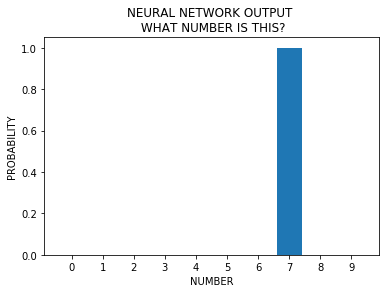

In [257]:
RESULT_temp=model.predict(IMG[0:1,:])
aux1=np.arange(len(RESULT_temp[0,:]))
plt.title('NEURAL NETWORK OUTPUT \n WHAT NUMBER IS THIS?')
plt.bar(aux1,RESULT_temp[0,:])
plt.xticks(np.arange(len(RESULT_temp[0,])))
plt.xlabel('NUMBER')
plt.ylabel('PROBABILITY')
plt.show()